In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
#Upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [36]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Show non null data if exist
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Show if the data has missing value
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
#Show the descriptive of data
data.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [7]:
#Show if the data has missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
pd.set_option('display.max_rows', data.shape[0]+1)

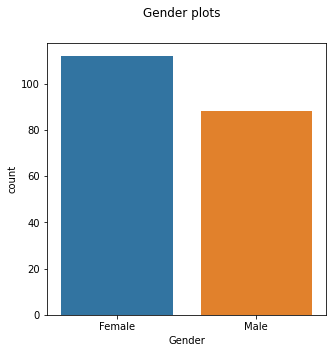

In [37]:
#Visualizing of Gender 
fig, ax1=plt.subplots(figsize=(5,5))
plt.suptitle("Gender plots")
sns.countplot(x="Gender", data=data, ax=ax1, order=data["Gender"].value_counts().index)
plt.show()

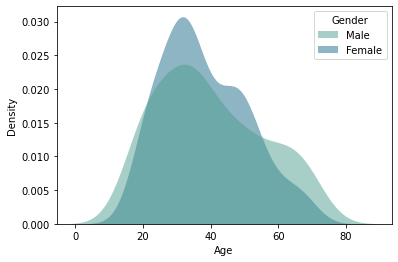

In [77]:
sns.kdeplot(
   data=data, x="Age", hue="Gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

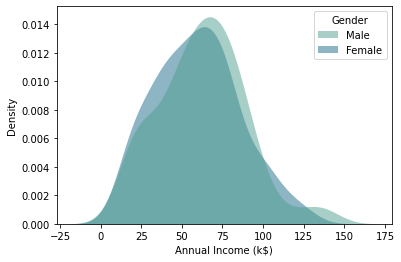

In [97]:
sns.kdeplot(
   data=data, x="Annual Income (k$)", hue="Gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

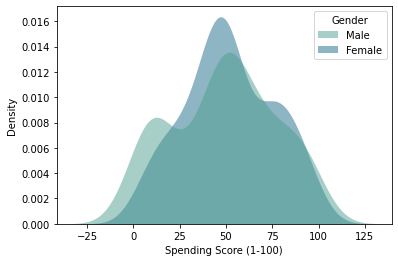

In [98]:
sns.kdeplot(
   data=data, x="Spending Score (1-100)", hue="Gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

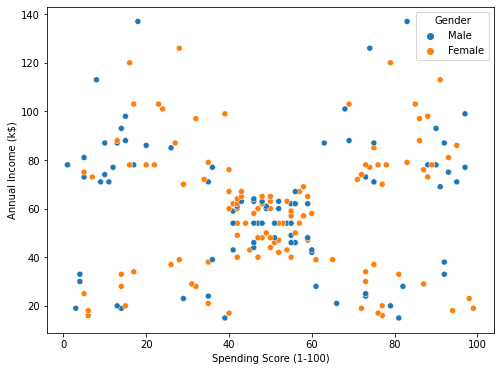

In [105]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender")

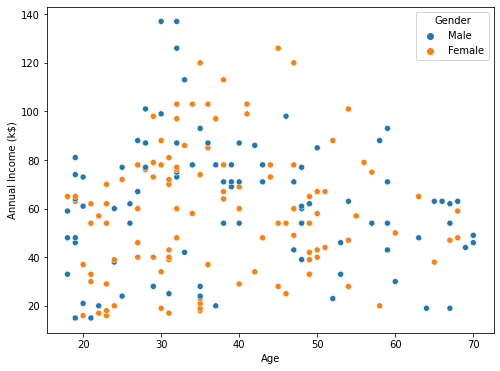

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Age", y="Annual Income (k$)", hue="Gender")

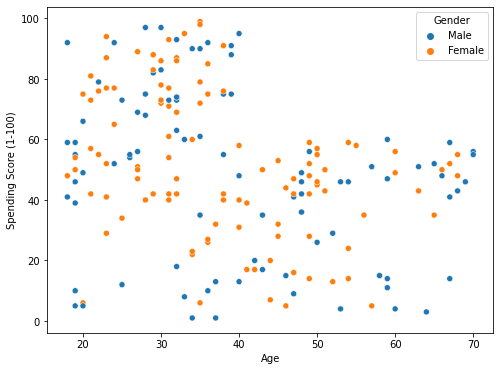

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)", hue="Gender")

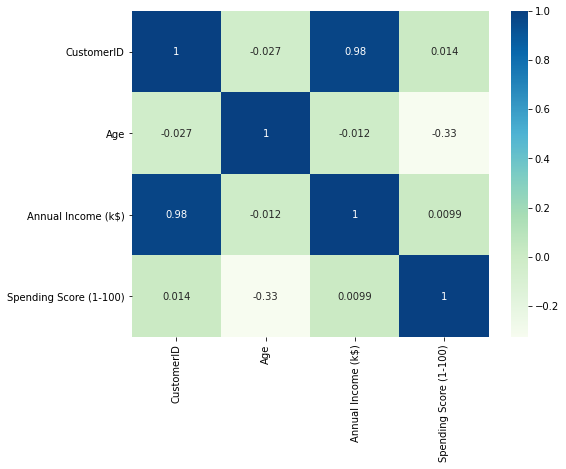

In [119]:
plt.figure(figsize=(8,6))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="GnBu")
plt.show()

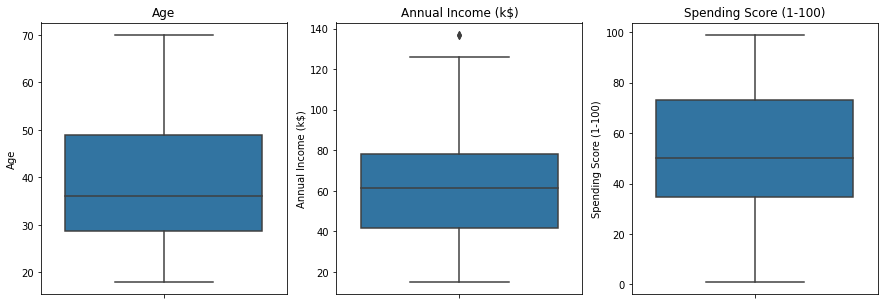

In [111]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.boxplot(y=data["Age"],ax=axes[0])
axes[0].set_title("Age")
s=sns.boxplot(y=data["Annual Income (k$)"],ax=axes[1])
axes[1].set_title("Annual Income (k$)")
s=sns.boxplot(y=data["Spending Score (1-100)"],ax=axes[2])
axes[2].set_title("Spending Score (1-100)")
plt.show()

In [133]:
data1 = data.drop(["CustomerID","Gender"], axis=1)
data1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [134]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

In [135]:
data2 = pd.DataFrame(data_scaled, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


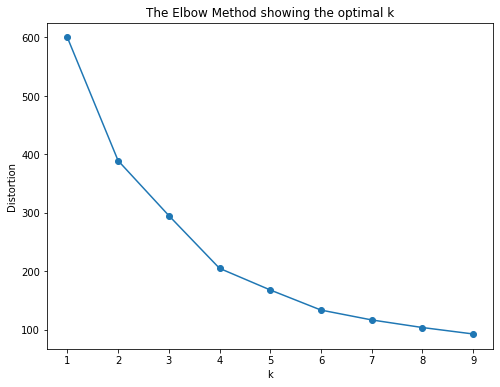

In [140]:
cluster = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(data2)
    cluster.append(model.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(K, cluster, marker='o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


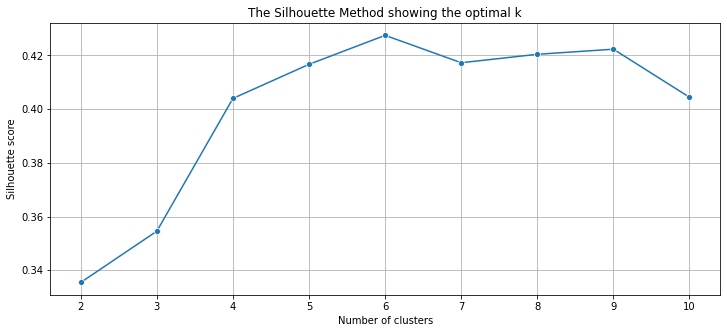

In [154]:
ss = []
clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []

for n in clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data2)
    clusters_inertia.append(KM_est.inertia_)   
    silhouette_avg = silhouette_score(data2, KM_est.labels_)
    ss.append(silhouette_avg)
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters, ss, marker='o', ax=ax)

ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
plt.title('The Silhouette Method showing the optimal k')
plt.grid()
plt.show()

In [159]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(data2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.33547192894004574
For n_clusters=3, the silhouette score is 0.357793388710272
For n_clusters=4, the silhouette score is 0.4039582785148566
For n_clusters=5, the silhouette score is 0.41664341513732767
For n_clusters=6, the silhouette score is 0.4268547747113388
For n_clusters=7, the silhouette score is 0.4180766295787896
For n_clusters=8, the silhouette score is 0.4100960228678141
For n_clusters=9, the silhouette score is 0.3879952385996212
For n_clusters=10, the silhouette score is 0.40351933445579163


In [174]:
kmeanModel = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeanModel.fit_predict(data2)
kmeanModel.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 2,
       2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [175]:
data2["Cluster ID"] = kmeanModel.labels_
data2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster ID
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,2
3,-1.137502,-1.700830,1.040418,3
4,-0.563369,-1.662660,-0.395980,2


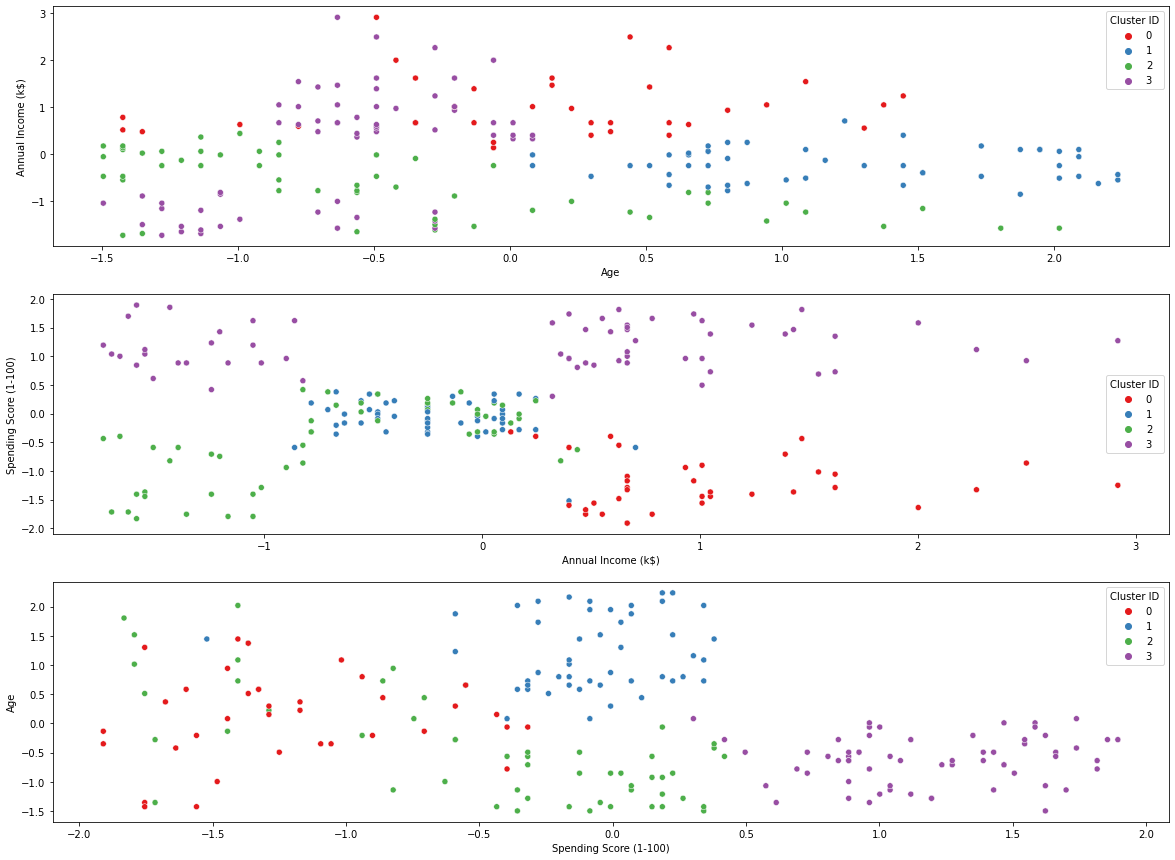

In [181]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x="Age", y="Annual Income (k$)", hue="Cluster ID", data = data2, legend="full", palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster ID", data = data2, legend="full", palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x="Spending Score (1-100)", y="Age", hue="Cluster ID", data= data2, legend="full", palette="Set1")
plt.show()